In [1]:
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages('tidytext')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’




In [2]:
library(tidyverse)
library(lubridate)
library(nycflights13)
library(tidytext)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Lecture 16: Dates

## Dates
Most of us have a pretty firm grasp on dates. But they can be more complicated than you might think. Consider these three questions from the book:
* Does every year have 365 days?
* Does every day have 24 hours?
* Does every minute have 60 seconds?

The answer to all three is "no".

As before, we'll rely on the `lubridate` package to work with dates:

In [ ]:
library(lubridate)

There are three different date classes in R:

* A date, printed in tibble as `<date>`, represents a full day on the calendar.
* A time within a day, printed as `<time>`, represents a specific time within an (unspecified) day.
* A date-time is a date plus a time (tibble: `<dttm>`). A date-time uniquely identifies an instant in time (up to a given precision, usually 1 second.)

We've already seen examples of date-times in the `flights` tibble:

In [ ]:
select(flights, time_hour) %>% print

# A tibble: 336,776 x 1
   time_hour          
   <dttm>             
 1 2013-01-01 05:00:00
 2 2013-01-01 05:00:00
 3 2013-01-01 05:00:00
 4 2013-01-01 05:00:00
 5 2013-01-01 06:00:00
 6 2013-01-01 05:00:00
 7 2013-01-01 06:00:00
 8 2013-01-01 06:00:00
 9 2013-01-01 06:00:00
10 2013-01-01 06:00:00
# … with 336,766 more rows


You should tend to favor working with dates over date-times if possible. The latter are more complicated because of the need to handle time zones.



We can get the current date and date-time using the `today()` and `now()` commands:

In [ ]:
today()

[1] "2023-03-15"

In [ ]:
now()

[1] "2023-03-15 08:56:32 EDT"

### Converting strings to dates and times
Frequently you will be encounter date and/or time data stored as text. You will need to convert these data into the native R date classes in order to use date functions on them. The `mdy/ymd/dmy` functions accomplish this.

In [ ]:
ymd("2017 01 31")
mdy("1 31 2017")
dmy("31 1 2017")
dmy("31-Jan-2017")

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

#### Date-time parsers
There are also equivalent functions for parsing date-times:

In [ ]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

In [ ]:
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 08:01:00 UTC"

Sometimes you can get away with calling `as_datetime()`:

In [4]:
as_datetime("2017-01-31 20:11:59")


[1] "2017-01-31 20:11:59 UTC"

But not always:

In [7]:
as_datetime("01/31/2017 08:01")

Warning message:
“All formats failed to parse. No formats found.”


[1] NA

In [9]:
?as_datetime

### Time zones
When we create a date-time, the default time zone is ["UTC"](https://en.wikipedia.org/wiki/Coordinated_Universal_Time):

In [ ]:
ymd_hm("2000-01-30 00:00")

[1] "2000-01-30 UTC"

This is a standard time zone which is, for historical reasons, equal to time in Greenwich, England.

If your times are coming from a different time zone you must specify using the `tz=` option:

In [64]:
ymd_hms("2017-6-30 20:11:59", tz="America/Detroit")
ymd_hms("2017-6-30 20:11:59", tz="America/Los_Angeles")

[1] "2017-06-30 20:11:59 EDT"

[1] "2017-06-30 20:11:59 PDT"

You can find your local time zone using:

In [ ]:
Sys.timezone()

[1] "America/Detroit"

### `strptime()`
This is another convenient method to convert to date/time

In [62]:
strptime("Monday, January 2,  2023", tz = "EST", format = "%A, %B %e, %Y")

[1] "2023-01-02 EST"

In [ ]:
?strptime

### The epoch
UNIX systems sometimes represent time as "the number of seconds which have elapsed since 1-1-1970." This date is known as "[the epoch](https://en.wikipedia.org/wiki/Unix_time)". So you may occasionally come across date-times that look like:

In [ ]:
now() %>% as.integer() 

[1] 1572358737

To convert these to date format you can use `as_datetime`:

In [ ]:
as_datetime(3600 * 24)  # 24 hours after the epoch

[1] "1970-01-02 UTC"

## 🤔 Quiz

Julian was born on September 22, 2019, at 1:05 PM EDT. How many seconds old is Julian?

<ol style="list-style-type: upper-alpha;">
    <li>About $10^6$</li>
    <li>About $10^8$</li>
    <li>About $10^{10}$</li>
    <li>About $10^{12}$</li>
</ol>

In [44]:
# seconds old



[1] 8.112909

### Making a date-time from components
The `make_date` and `make_datetime` functions can make dates from individual (numerical) components:

In [67]:
make_datetime(2023, 3, 15, 10, 00, 59, tz="EDT")

[1] "2023-03-15 14:00:59 EDT"

#### Example: departure and arrival times in `flights`
The `flights` table has scheduled as well as actual arrival and departure times. Let's create a date-time variable from the actual departure time. First we need to take note of the fact that `dep_time` and `arr_time` are in a weird format:

In [ ]:
flights %>% select(dep_time) %>% head

dep_time
<int>
517
533
542
544
554
554


In [109]:
# create datetime and sched_dep_time from flights
flights_dt <- flights %>% 
  mutate(across(c(dep_time, sched_dep_time, arr_time, sched_arr_time), 
                          ~ make_datetime(year, month, day, . %/% 100, . %% 100)))

Now we can use built in R command to query and plot these data based on actual departure time:

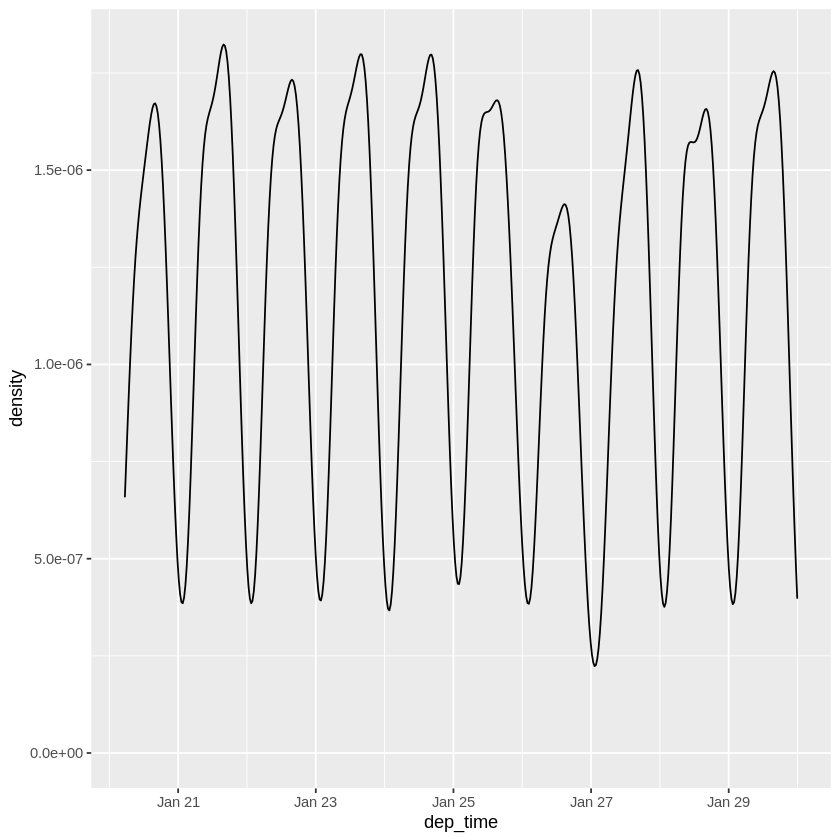

In [73]:
flights_dt %>% 
  filter(dep_time < ymd(20130130), dep_time >= ymd(20130120)) %>% 
  ggplot(aes(x = dep_time)) + 
  geom_density(bw = 3*3600)

In [ ]:
?geom_density

Notice that this command and resulting graph looks much nicer than if we did not use the date classes:
* The filter on `dep_time` looks more natural than `filter(day<2, month==1, year==2013)`.
* We can easily express the bin-width of 600 seconds in `geom_freqpoly(binwidth = 600)`. When you use date-times in a numeric context (like in a histogram), 1 means 1 second; for dates, 1 means 1 day.
* The plot x axis has nice readable labels.

### Date-time components
The functions `year()`, `month()`, `mday()` (day of the month), `yday()` (day of the year), `wday()` (day of the week), `hour()`, `minute()`, and `second()` can extract components from dates and times:

In [ ]:
mdy_hms(c("March 12, 2018 12:00:00")) 

[1] "2018-03-12 12:00:00 UTC"

### Example
By extracting the minute component of scheduled departure time, we uncover a surprising pattern:

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


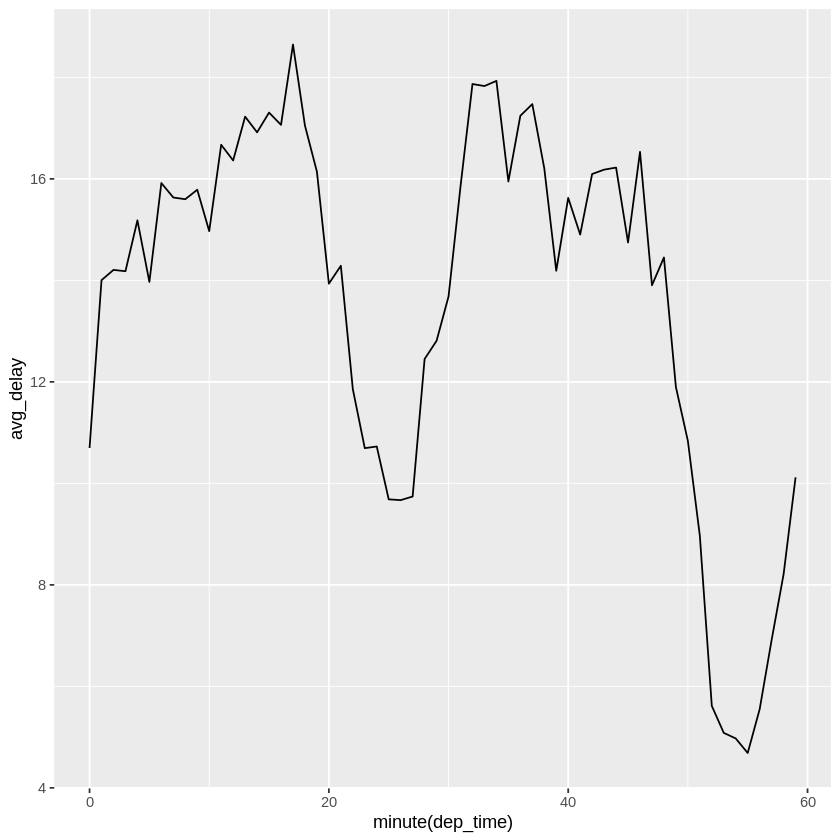

In [80]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(dep_delay, na.rm = TRUE)) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line() + labs(x="minute(dep_time)")

But when grouped by *scheduled departure*, time the delays seem to be random:

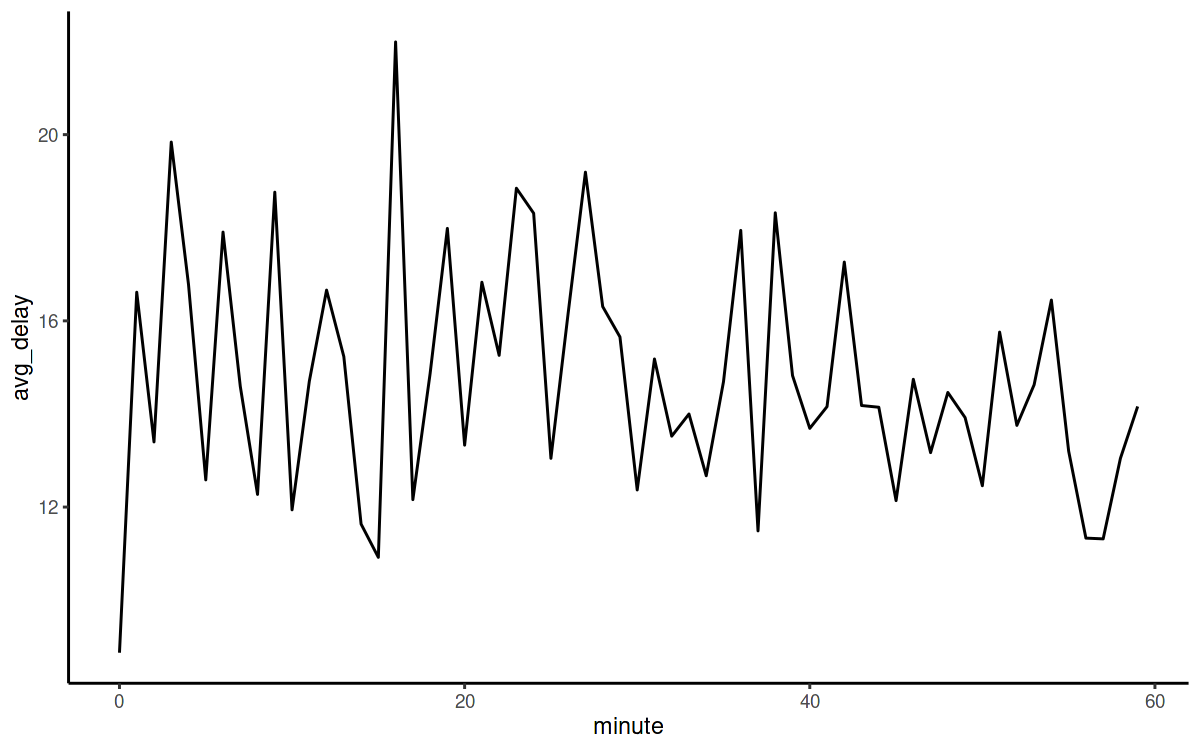

In [ ]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

### Time spans
Time spans are the difference between two time points. These are represented in R by the `difftime` class:

In [81]:
(d = today() - update(today(), year=2010))
class(d)

Time difference of 4748 days

[1] "difftime"

Because it is usually simpler to reason about time differences in terms of a single number, `lubridate` also provides a `duration` class which is stored in terms of seconds:

In [ ]:
as.duration(1234)

[1] "1234s (~20.57 minutes)"

In [ ]:
dseconds(10)

[1] "10s"

In [ ]:
dweeks(3)

[1] "1814400s (~3 weeks)"

Arithmetic with durations works as you would expect:

In [ ]:
2 * dyears(1)

[1] "63072000s (~2 years)"

In [ ]:
dyears(1) + dweeks(12) + dhours(15)

[1] "38847600s (~1.23 years)"

You have to be careful when adding durations and dates. What is 1 day after next Saturday at 1pm?

In [85]:
next_saturday = mdy_hm("Nov. 4, 2023 13:00PM", tz="America/Detroit")
next_saturday + ddays(1)

[1] "2023-11-05 12:00:00 EST"

To prevent this sort of thing from happening, `lubridate` also offers objects called "periods":

In [ ]:
days(1)
class(days(1))

[1] "1d 0H 0M 0S"

[1] "Period"
attr(,"package")
[1] "lubridate"

Similarly, periods have the expected behaviour if you add one year to a leap year:

In [86]:
ymd("2020-01-01") + dyears(1)
ymd("2020-01-01") + years(1)

[1] "2020-12-31 06:00:00 UTC"

[1] "2021-01-01"

## 🤔 Quiz

Leo was born on Jan 16, 2022. When will Leo be 1000 days old?

<ol style="list-style-type: upper-alpha;">
    <li>Today</li>
    <li>Oct 12, 2024</li>
    <li>February 9, 2025</li>
    <li>March 10, 2026</li>
</ol>

In [95]:
# 1k days old


#### Fixing time issues
Earlier in the semester we saw how some flights seem to have arrived before they departed:

In [ ]:
filter(flights, arr_time < dep_time) %>% head %>% print

# A tibble: 6 × 19
   year month   day dep_time sched_dep…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
  <int> <int> <int>    <int>       <int>   <dbl>   <int>   <int>   <dbl> <chr>  
1  2013     1     1     1929        1920       9       3       7      -4 UA     
2  2013     1     1     1939        1840      59      29    2151      NA 9E     
3  2013     1     1     2058        2100      -2       8    2359       9 UA     
4  2013     1     1     2102        2108      -6     146     158     -12 UA     
5  2013     1     1     2108        2057      11      25      39     -14 UA     
6  2013     1     1     2120        2130     -10      16      18      -2 B6     
# … with 9 more variables: flight <int>, tailnum <chr>, origin <chr>,
#   dest <chr>, air_time <dbl>, distance <dbl>, hour <dbl>, minute <dbl>,
#   time_hour <dttm>, and abbreviated variable names ¹​sched_dep_time,
#   ²​dep_delay, ³​arr_time, ⁴​sched_arr_time, ⁵​arr_delay


This is because these are overnight flights. To fix this, we can now simply add one day to `arr_time`:

In [113]:
flights_dt %>% 
    mutate(arr_time = ifelse(arr_time - dep_time <= 0, (arr_time + days(1)), arr_time)) %>% 
    select(origin, dest, arr_time, dep_time) %>% print

# A tibble: 336,776 × 4
   origin dest    arr_time dep_time           
   <chr>  <chr>      <dbl> <dttm>             
 1 EWR    IAH   1357029000 2013-01-01 05:17:00
 2 LGA    IAH   1357030200 2013-01-01 05:33:00
 3 JFK    MIA   1357032180 2013-01-01 05:42:00
 4 JFK    BQN   1357034640 2013-01-01 05:44:00
 5 LGA    ATL   1357027920 2013-01-01 05:54:00
 6 EWR    ORD   1357026000 2013-01-01 05:54:00
 7 EWR    FLL   1357031580 2013-01-01 05:55:00
 8 LGA    IAD   1357024140 2013-01-01 05:57:00
 9 JFK    MCO   1357029480 2013-01-01 05:57:00
10 LGA    ORD   1357026780 2013-01-01 05:58:00
# ℹ 336,766 more rows
